# Imports

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

# Data import

In [2]:
data = pd.read_csv('../raw_data/kaggle_data.csv')

In [8]:
data.head(20)

,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,mean,std,median,skew,kurt,shapiro_wilk_test
0,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,age,NaN,"['63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, ...",[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 ...,41,54.366337,9.082101,55.0,-0.202463,-0.542167,5.800190e-03
1,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,sex,NaN,"['1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,...",[1 0],2,0.683168,0.466011,1.0,-0.791335,-1.382961,2.750313e-26
2,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,cp,NaN,"['3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3,...",[3 2 1 0],4,0.966997,1.032052,1.0,0.484732,-1.193071,1.857026e-19
3,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,trestbps,NaN,"['145, 130, 130, 120, 120, 140, 140, 120, 172,...",[145 130 120 140 172 150 110 135 160 105 125 1...,49,131.623762,17.538143,130.0,0.713768,0.929054,1.458000e-06
4,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,chol,NaN,"['233, 250, 204, 236, 354, 192, 294, 263, 199,...",[233 250 204 236 354 192 294 263 199 168 239 2...,152,246.264026,51.830751,240.0,1.143401,4.505423,5.364669e-09
5,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,fbs,NaN,"['1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,...",[1 0],2,0.148515,0.356198,0.0,1.986652,1.959678,5.430854e-30
6,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,restecg,NaN,"['0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,...",[0 1 2],3,0.528053,0.525860,1.0,0.162522,-1.362673,1.378401e-23
7,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,thalach,NaN,"['150, 187, 172, 178, 163, 148, 153, 173, 162,...",[150 187 172 178 163 148 153 173 162 174 160 1...,91,149.646865,22.905161,153.0,-0.537410,-0.061970,6.620309e-05
8,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,exang,NaN,"['0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",[0 1],2,0.326733,0.469794,0.0,0.742532,-1.458317,3.846865e-26
9,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,oldpeak,NaN,"['2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5,...",[2.3 3.5 1.4 0.8 0.6 0.4 1.3 0. 0.5 1.6 1.2 0...,40,1.039604,1.161075,0.8,1.269720,1.575813,8.183467e-17


In [4]:
data.shape

(15022, 13)

In [10]:
data['column_values_unique'][16]


"['male' 'female']"

(-99793068497.50623, 100000000000.0)

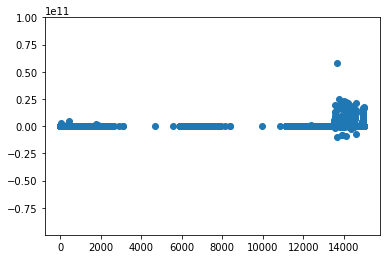

In [176]:
plt.scatter(range(len(data)),data['mean'])
plt.ylim(top=100000000000) 

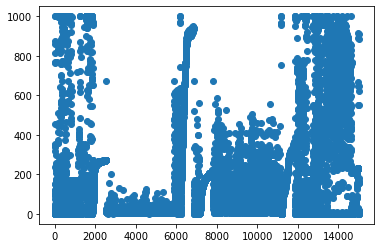

In [177]:
plt.scatter(range(len(data)),data['nunique_values'])

In [178]:
data['nunique_values'][2020]

242

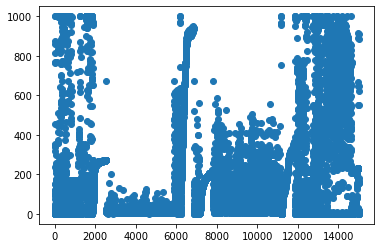

In [179]:
plt.scatter(range(len(data)),data['nunique_values'])

<AxesSubplot:>

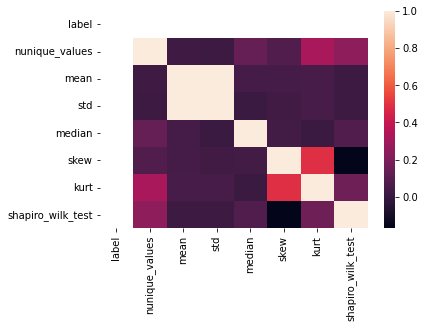

In [180]:
sns.heatmap(data.corr())

<AxesSubplot:ylabel='nunique_values'>

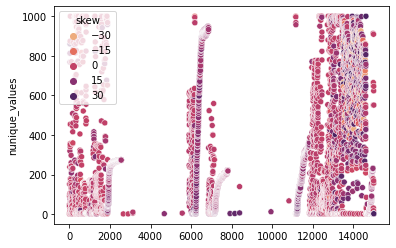

In [181]:
sns.scatterplot(data=data, x=range(len(data)), y='nunique_values', hue="skew",palette='flare')

In [182]:
data_k_means = data.drop(columns=['dataset_name','table_name','column_name',
                                  'label','column_values','column_values_unique'])

In [183]:
data_k_means.head()

,nunique_values,mean,std,median,skew,kurt,shapiro_wilk_test
0,41,54.366337,9.082101,55.0,-0.202463,-0.542167,5.800190e-03
1,2,0.683168,0.466011,1.0,-0.791335,-1.382961,2.750313e-26
2,4,0.966997,1.032052,1.0,0.484732,-1.193071,1.857026e-19
3,49,131.623762,17.538143,130.0,0.713768,0.929054,1.458000e-06
4,152,246.264026,51.830751,240.0,1.143401,4.505423,5.364669e-09


# KMeans with 6 Clusters

In [184]:
data_k_means = data_k_means.fillna(0)

In [185]:
data_k_means = data_k_means.replace([np.inf, -np.inf],999999999999 )

In [186]:
data_k_means.describe()

,nunique_values,mean,std,median,skew,kurt,shapiro_wilk_test
count,15022.000000,1.502200e+04,1.502200e+04,1.502200e+04,15022.000000,15022.000000,1.502200e+04
mean,201.671881,3.591549e+08,4.590667e+09,4.537380e+06,3.259444,69.661546,1.715940e-01
std,278.103185,1.863831e+10,4.513187e+11,6.839864e+07,7.005113,158.987373,3.747437e-01
min,0.000000,-9.854906e+09,0.000000e+00,-1.508465e+08,-31.412691,-4.772838,0.000000e+00
25%,12.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,70.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
75%,264.000000,5.816292e+01,1.648802e+02,1.000000e+01,7.204745,73.622962,3.978034e-30
max,1000.000000,1.788908e+12,5.528657e+13,4.511018e+09,31.622777,1000.000000,1.000000e+00


In [187]:
k_means_5_model = KMeans(n_clusters=6, max_iter=1000)
k_means_5_model.fit(data_k_means)

KMeans(max_iter=1000, n_clusters=6)

In [188]:
pd.DataFrame(k_means_5_model.labels_).value_counts()

0    14919
4       97
3        2
5        2
1        1
2        1
dtype: int64

In [189]:
pd.DataFrame(k_means_5_model.labels_).value_counts()[1]/len(data)

6.656903208627346e-05

# KMeans with 6 Clusters and Standard Scaled data

In [190]:
standard_scaler = StandardScaler()
standard_scaler.fit(data_k_means)
data_k_means_scaled = data_k_means
data_k_means_scaled = standard_scaler.transform(data_k_means_scaled)

In [191]:
data_k_means_scaled

array([[-0.5777612 , -0.01927035, -0.01017201, ..., -0.4942136 ,
        -0.44158255, -0.44243404],
       [-0.71800158, -0.01927035, -0.01017201, ..., -0.57827955,
        -0.44687116, -0.4579123 ],
       [-0.71080977, -0.01927035, -0.01017201, ..., -0.39611117,
        -0.44567675, -0.4579123 ],
       ...,
       [-0.71800158, -0.01927035, -0.01017201, ...,  4.04908203,
         5.85184472, -0.4579123 ],
       [ 1.25615155, -0.01927031, -0.01017201, ..., -0.24175567,
        -0.41533316, -0.4579123 ],
       [-0.7251934 , -0.01927035, -0.01017201, ..., -0.46531042,
        -0.43817231,  2.21066701]])

In [192]:
k_means_6_model_scaled = KMeans(n_clusters=6, max_iter=1000)
k_means_6_model_scaled.fit(data_k_means_scaled)

KMeans(max_iter=1000, n_clusters=6)

In [193]:
k_means_6_model_scaled.labels_

array([0, 0, 0, ..., 2, 5, 3], dtype=int32)

In [194]:
pd.DataFrame(k_means_6_model_scaled.labels_).value_counts()

0    9003
5    3178
3    2028
2     778
4      34
1       1
dtype: int64

In [195]:
len(pd.DataFrame(k_means_6_model_scaled.labels_))

15022

In [196]:
len(data)

15022

In [197]:
data['pred_from_cluster'] = k_means_6_model_scaled.labels_

In [198]:
data

,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,mean,std,median,skew,kurt,shapiro_wilk_test,pred_from_cluster
0,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,age,NaN,"['63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, ...",[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 ...,41,54.366337,9.082101,55.0,-0.202463,-0.542167,5.800190e-03,0
1,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,sex,NaN,"['1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,...",[1 0],2,0.683168,0.466011,1.0,-0.791335,-1.382961,2.750313e-26,0
2,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,cp,NaN,"['3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3,...",[3 2 1 0],4,0.966997,1.032052,1.0,0.484732,-1.193071,1.857026e-19,0
3,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,trestbps,NaN,"['145, 130, 130, 120, 120, 140, 140, 120, 172,...",[145 130 120 140 172 150 110 135 160 105 125 1...,49,131.623762,17.538143,130.0,0.713768,0.929054,1.458000e-06,0
4,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,chol,NaN,"['233, 250, 204, 236, 354, 192, 294, 263, 199,...",[233 250 204 236 354 192 294 263 199 168 239 2...,152,246.264026,51.830751,240.0,1.143401,4.505423,5.364669e-09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15017,divyansh22/flight-delay-prediction,Jan_2019_ontime.csv,ARR_DEL15,NaN,"['0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0,...",[ 0. 1. nan],2,0.216718,0.412222,0.0,1.377257,-0.103382,1.000000e+00,3
15018,divyansh22/flight-delay-prediction,Jan_2019_ontime.csv,CANCELLED,NaN,"['0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[0. 1.],2,0.034000,0.181320,0.0,5.150390,24.575662,0.000000e+00,0
15019,divyansh22/flight-delay-prediction,Jan_2019_ontime.csv,DIVERTED,NaN,"['0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[0. 1.],2,0.001000,0.031623,0.0,31.622777,1000.000000,0.000000e+00,2
15020,divyansh22/flight-delay-prediction,Jan_2019_ontime.csv,DISTANCE,NaN,"['77.0, 935.0, 1024.0, 288.0, 1246.0, 119.0, 5...",[ 77. 935. 1024. 288. 1246. 119. 524. 38...,551,824.004000,601.881579,675.0,1.565974,3.631016,5.412346e-28,5


In [199]:
labeled_data = pd.read_csv('../raw_data/kaggle_data_1000.csv')

In [200]:
labeled_data.head()

,Unnamed: 0,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,mean,std,median,skew,kurt,shapiro_wilk_test
0,14641,fivethirtyeight/the-ultimate-halloween-candy-p...,candy-data.csv,hard,cat-binary,"['0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...",[0 1],2,0.176471,0.383482,0.0,1.727981,1.009110,4.350000e-16
1,11888,secareanualin/football-events,events.csv,fast_break,cat-binary,"['0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[0 1],2,0.009000,0.094488,0.0,10.413713,106.658734,0.000000e+00
2,11851,secareanualin/football-events,ginf.csv,adv_stats,cat-binary,"['True, True, True, True, False, True, True, T...",[ True False],2,0.918000,0.274502,1.0,-3.051618,7.327024,0.000000e+00
3,1315,uciml/forest-cover-type-dataset,covtype.csv,Soil_Type21,cat-binary,"['0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[0 1],2,0.002000,0.044699,0.0,22.327046,497.491978,0.000000e+00
4,1263,nehaprabhavalkar/indian-food-101,indian_food.csv,diet,cat-binary,"['vegetarian, vegetarian, vegetarian, vegetari...",['vegetarian' 'non vegetarian'],2,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
labeled_data = labeled_data[['dataset_name','table_name','column_name','label']]

In [202]:
labeled_data

,dataset_name,table_name,column_name,label
0,fivethirtyeight/the-ultimate-halloween-candy-p...,candy-data.csv,hard,cat-binary
1,secareanualin/football-events,events.csv,fast_break,cat-binary
2,secareanualin/football-events,ginf.csv,adv_stats,cat-binary
3,uciml/forest-cover-type-dataset,covtype.csv,Soil_Type21,cat-binary
4,nehaprabhavalkar/indian-food-101,indian_food.csv,diet,cat-binary
...,...,...,...,...
995,utkarshxy/who-worldhealth-statistics-2020-comp...,reproductiveAgeWomen.csv,Indicator,text
996,andrewmvd/trip-advisor-hotel-reviews,tripadvisor_hotel_reviews.csv,Review,text
997,cjgdev/formula-1-race-data-19502017,constructors.csv,constructorRef,other
998,kaggle/kaggle-survey-2017,freeformResponses.csv,CoursePlatformFreeForm,text


In [206]:

#for index_lab, row_lab in labeled_data.iterrows():
#    for index_data, row_data in data.iterrows():
 #       if row_lab['dataset_name'] == row_data['dataset_name'] and row_lab['table_name'] == row_data['table_name'] and row_lab['column_name'] == row_data['column_name']:
 #           row_data['label'] = row_lab['label'][index_lab]
#data.merge(labeled_data, how='left', on=['dataset_name','table_name','column_name'])
data_merged = pd.merge(data,labeled_data, how='left', on=['dataset_name','table_name','column_name'])



In [208]:
data_merged['label_y'].value_counts()

int           746
float         170
cat-multi      42
text            9
cat-binary      9
other           8
date            7
Name: label_y, dtype: int64

In [220]:
data_merged[data_merged['label_y'].notna()]

,dataset_name,table_name,column_name,label_x,column_values,column_values_unique,nunique_values,mean,std,median,skew,kurt,shapiro_wilk_test,pred_from_cluster,label_y
7,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,thalach,NaN,"['150, 187, 172, 178, 163, 148, 153, 173, 162,...",[150 187 172 178 163 148 153 173 162 174 160 1...,91,1.496469e+02,2.290516e+01,1.530000e+02,-0.537410,-0.061970,6.620309e-05,0,int
23,kimjihoo/coronavirusdataset,SearchTrend.csv,coronavirus,NaN,"['0.00763, 0.00681, 0.01909, 0.00563, 0.00799,...",[7.630000e-03 6.810000e-03 1.909000e-02 5.6300...,319,2.105226e+00,9.913348e+00,8.900000e-03,6.294594,43.184797,0.000000e+00,5,float
32,kimjihoo/coronavirusdataset,Weather.csv,province,NaN,"['Daejeon, Seoul, Chungcheongbuk-do, Jeju-do, ...",['Daejeon' 'Seoul' 'Chungcheongbuk-do' 'Jeju-d...,17,NaN,NaN,NaN,NaN,NaN,NaN,0,cat-multi
43,kimjihoo/coronavirusdataset,PatientInfo.csv,age,NaN,"['60s, 60s, 40s, 20s, 70s, 80s, 20s, nan, nan,...",['60s' '40s' '20s' '70s' '80s' nan '50s' '90s'...,10,NaN,NaN,NaN,NaN,NaN,NaN,0,cat-multi
55,kimjihoo/coronavirusdataset,Policy.csv,policy_id,NaN,"['1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...",[ 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...,61,3.100000e+01,1.775293e+01,3.100000e+01,0.000000,-1.200000,2.565956e-02,0,int
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14890,srikantsahu/co2-and-ghg-emission-data,emission data.csv,1930,NaN,"['0.0, 676374400.0, 0.0, 534944.0, 3759960160....",[0.00000000e+00 6.76374400e+08 5.34944000e+05 ...,68,1.568471e+09,1.111207e+10,0.000000e+00,10.089767,113.640219,2.551079e-31,5,int
14936,srikantsahu/co2-and-ghg-emission-data,emission data.csv,1976,NaN,"['23279471.0, 7504779055.0, 72279728.0, 329291...",[2.32794710e+07 7.50477906e+09 7.22797280e+07 ...,211,5.750457e+09,3.878276e+10,4.576794e+07,11.359356,144.114059,2.756270e-31,5,float
14948,srikantsahu/co2-and-ghg-emission-data,emission data.csv,1988,NaN,"['53838190.0, 14568340496.0, 157995344.0, 1070...",[5.38381900e+07 1.45683405e+10 1.57995344e+08 ...,216,8.428223e+09,5.515562e+10,1.039153e+08,11.692444,152.604508,3.060124e-31,5,float
14978,divyansh22/flight-delay-prediction,Jan_2020_ontime.csv,DAY_OF_MONTH,NaN,"['6, 25, 8, 29, 24, 4, 6, 1, 21, 17, 3, 9, 5, ...",[ 6 25 8 29 24 4 1 21 17 3 9 5 2 23 27 ...,31,1.593400e+01,8.919372e+00,1.600000e+01,0.003882,-1.215994,9.853356e-18,0,cat-multi


In [225]:
data_merged[data_merged['label_y'].notna()].loc[data_merged['label_y']=='int']['pred_from_cluster'].value_counts()

0    493
5    191
3     45
2     17
Name: pred_from_cluster, dtype: int64

In [226]:
data_merged[data_merged['label_y'].notna()].loc[data_merged['label_y']=='float']['pred_from_cluster'].value_counts()

3    69
0    44
2    39
5    17
4     1
Name: pred_from_cluster, dtype: int64

In [227]:
data_merged[data_merged['label_y'].notna()].loc[data_merged['label_y']=='cat-multi']['pred_from_cluster'].value_counts()

0    36
3     6
Name: pred_from_cluster, dtype: int64

In [228]:
data_merged[data_merged['label_y'].notna()].loc[data_merged['label_y']=='other']['pred_from_cluster'].value_counts()

0    4
5    4
Name: pred_from_cluster, dtype: int64

In [229]:
data_merged[data_merged['label_y'].notna()].loc[data_merged['label_y']=='text']['pred_from_cluster'].value_counts()

0    7
5    1
3    1
Name: pred_from_cluster, dtype: int64

In [230]:
data_merged[data_merged['label_y'].notna()].loc[data_merged['label_y']=='date']['pred_from_cluster'].value_counts()

0    5
3    1
5    1
Name: pred_from_cluster, dtype: int64